### Part A


In [1]:
import pandas as pd

# Load the dataset
file_path = 'DataNeuron_Text_Similarity.csv'
df = pd.read_csv(file_path)

# Display the first few rows
print("First 5 rows of the dataset:")
print(df.head())

# Check basic information about the dataset
print("\nDataset Info:")
print(df.info())

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())


First 5 rows of the dataset:
                                               text1  \
0  broadband challenges tv viewing the number of ...   
1  rap boss arrested over drug find rap mogul mar...   
2  player burn-out worries robinson england coach...   
3  hearts of oak 3-2 cotonsport hearts of oak set...   
4  sir paul rocks super bowl crowds sir paul mcca...   

                                               text2  
0  gardener wins double in glasgow britain s jaso...  
1  amnesty chief laments war failure the lack of ...  
2  hanks greeted at wintry premiere hollywood sta...  
3  redford s vision of sundance despite sporting ...  
4  mauresmo opens with victory in la amelie maure...  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text1   3000 non-null   object
 1   text2   3000 non-null   object
dtypes: object(2)
memory usage: 47.0+ K

In [2]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

# Download necessary NLTK data
nltk.download('punkt')
nltk.download('stopwords')

# Initialize stemmer and stopwords
stemmer = PorterStemmer()
stop_words = set(stopwords.words('english'))

# Preprocessing function
def preprocess_text(text):
    # Lowercase the text
    text = text.lower()
    # Remove special characters and numbers
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Tokenization
    tokens = word_tokenize(text)
    # Remove stopwords and apply stemming
    tokens = [stemmer.stem(word) for word in tokens if word not in stop_words]
    return ' '.join(tokens)

# Apply preprocessing to both text columns
df['text1_clean'] = df['text1'].apply(preprocess_text)
df['text2_clean'] = df['text2'].apply(preprocess_text)

print("Preprocessing complete. Sample output:")
print(df[['text1_clean', 'text2_clean']].head())


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\91908\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\91908\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Preprocessing complete. Sample output:
                                         text1_clean  \
0  broadband challeng tv view number european bro...   
1  rap boss arrest drug find rap mogul marion sug...   
2  player burnout worri robinson england coach an...   
3  heart oak cotonsport heart oak set ghanaian co...   
4  sir paul rock super bowl crowd sir paul mccart...   

                                         text2_clean  
0  garden win doubl glasgow britain jason garden ...  
1  amnesti chief lament war failur lack public ou...  
2  hank greet wintri premier hollywood star tom h...  
3  redford vision sundanc despit sport corduroy c...  
4  mauresmo open victori la ameli mauresmo maria ...  


In [3]:
import torch
from sentence_transformers import SentenceTransformer, util
import pandas as pd

# Load pre-trained BERT model (Sentence-BERT)
print("Loading BERT model...")
model = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')
print("Model loaded successfully.")


# Debugging: Check initial DataFrame state
print("Initial DataFrame Info:")
print(df.info())
print(df.head())

# Generate BERT embeddings
def get_embeddings(text1, text2):
    try:
        embeddings1 = model.encode(text1, convert_to_tensor=True)
        embeddings2 = model.encode(text2, convert_to_tensor=True)
        return embeddings1, embeddings2
    except Exception as e:
        print(f"Error generating embeddings for: {text1}, {text2}")
        print(f"Exception: {e}")
        return None, None

# Calculate Cosine Similarity
def calculate_similarity(text1, text2):
    emb1, emb2 = get_embeddings(text1, text2)
    if emb1 is None or emb2 is None:
        return None
    try:
        similarity = util.pytorch_cos_sim(emb1, emb2)
        return similarity.item()
    except Exception as e:
        print(f"Error calculating similarity: {e}")
        return None

# Compute similarity for all text pairs with error handling
print("Calculating BERT Similarity for each row...")
try:
    df['bert_similarity'] = df.apply(lambda row: calculate_similarity(row['text1_clean'], row['text2_clean']), axis=1)
    print("Similarity Calculation Complete.")
except KeyError as e:
    print(f"KeyError: {e}. Please check column names.")
except Exception as e:
    print(f"Unexpected error: {e}")

# Debugging: Check if 'bert_similarity' column was created
if 'bert_similarity' in df.columns:
    print("Sample Output:")
    print(df[['text1_clean', 'text2_clean', 'bert_similarity']].head())
else:
    print("Error: 'bert_similarity' column not found. Check previous steps.")


C:\Users\91908\anaconda3\envs\venv_38\lib\site-packages\sentence_transformers\cross_encoder\CrossEncoder.py:11: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange


Loading BERT model...


C:\Users\91908\anaconda3\envs\venv_38\lib\site-packages\transformers\tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Model loaded successfully.
Initial DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   text1        3000 non-null   object
 1   text2        3000 non-null   object
 2   text1_clean  3000 non-null   object
 3   text2_clean  3000 non-null   object
dtypes: object(4)
memory usage: 93.9+ KB
None
                                               text1  \
0  broadband challenges tv viewing the number of ...   
1  rap boss arrested over drug find rap mogul mar...   
2  player burn-out worries robinson england coach...   
3  hearts of oak 3-2 cotonsport hearts of oak set...   
4  sir paul rocks super bowl crowds sir paul mcca...   

                                               text2  \
0  gardener wins double in glasgow britain s jaso...   
1  amnesty chief laments war failure the lack of ...   
2  hanks greeted at wintry premiere hollywood 

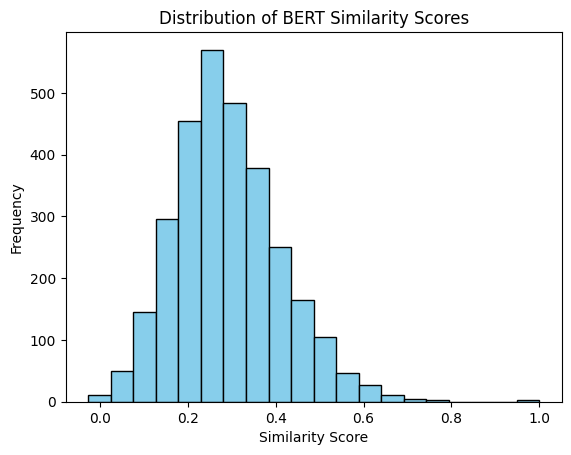

In [4]:
import matplotlib.pyplot as plt

plt.hist(df['bert_similarity'].dropna(), bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of BERT Similarity Scores')
plt.xlabel('Similarity Score')
plt.ylabel('Frequency')
plt.show()


In [5]:
low_scores = df[df['bert_similarity'] < 0.2][['text1_clean', 'text2_clean', 'bert_similarity']]
print("Low Similarity Examples:")
print(low_scores.head())

high_scores = df[df['bert_similarity'] > 0.8][['text1_clean', 'text2_clean', 'bert_similarity']]
print("High Similarity Examples:")
print(high_scores.head())



Low Similarity Examples:
                                          text1_clean  \
3   heart oak cotonsport heart oak set ghanaian co...   
5   india deport bollywood actress india order dep...   
7   aid climat top davo agenda climat chang fight ...   
8   kennedi predict bigger turnout voter pent pass...   
23  imf cut german growth estim intern monetari fu...   

                                          text2_clean  bert_similarity  
3   redford vision sundanc despit sport corduroy c...         0.117150  
5   foster buy stake winemak australian brewer fos...         0.136722  
7   howl help boost japan cinema japan box offic r...         0.188884  
8   ocean twelv raid box offic ocean twelv crime c...         0.138088  
23  incred win anim award incred movi beaten shrek...         0.052865  
High Similarity Examples:
                                            text1_clean  \
2304  spur sign iceland u star tottenham prime snap ...   
2820  banker lose sexism claim former execut londo

In [6]:
df.to_csv('bert_similarity_results.csv', index=False)
print("Results saved to 'bert_similarity_results.csv'")


Results saved to 'bert_similarity_results.csv'


In [8]:
threshold = 0.7

# Classify based on similarity score
df['similarity_label'] = df['bert_similarity'].apply(lambda x: 'Similar' if x >= threshold else 'Not Similar')

print(df[['text1_clean', 'text2_clean', 'bert_similarity', 'similarity_label']].head())


                                         text1_clean  \
0  broadband challeng tv view number european bro...   
1  rap boss arrest drug find rap mogul marion sug...   
2  player burnout worri robinson england coach an...   
3  heart oak cotonsport heart oak set ghanaian co...   
4  sir paul rock super bowl crowd sir paul mccart...   

                                         text2_clean  bert_similarity  \
0  garden win doubl glasgow britain jason garden ...         0.232777   
1  amnesti chief lament war failur lack public ou...         0.320726   
2  hank greet wintri premier hollywood star tom h...         0.275782   
3  redford vision sundanc despit sport corduroy c...         0.117150   
4  mauresmo open victori la ameli mauresmo maria ...         0.336709   

  similarity_label  
0      Not Similar  
1      Not Similar  
2      Not Similar  
3      Not Similar  
4      Not Similar  


In [9]:
print(df['similarity_label'].value_counts())


similarity_label
Not Similar    2994
Similar           6
Name: count, dtype: int64


C:\Users\91908\AppData\Local\Temp\ipykernel_20584\2719939017.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='similarity_label', data=df, palette='viridis')


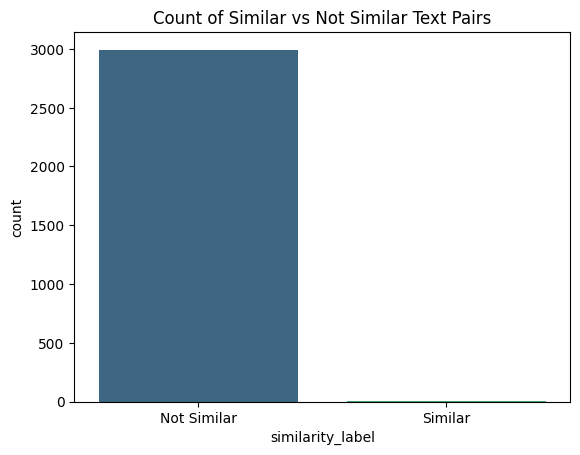

In [10]:
import seaborn as sns

sns.countplot(x='similarity_label', data=df, palette='viridis')
plt.title('Count of Similar vs Not Similar Text Pairs')
plt.show()
